In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from pandas.plotting import scatter_matrix

from app import Bank
import app.utils

In [3]:
bank = Bank('DKB')
print(f'Bank: {bank.name}')

Bank: DKB


## Accounts

In [4]:
bank.accounts

,id,firstname,lastname,balance


## Transactions

In [5]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp


## Open Accounts

In [6]:
bank.open_account(account_id=1, firstname='Dalia', lastname='Das')
bank.open_account(account_id=2, firstname='Matthias', lastname='Rettenmeier')
bank.open_account(account_id=3, firstname='Manuel', lastname='Wiedenmann')

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


In [173]:
bank.accounts

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


## Add transactions

In [7]:
bank.add_transaction(transaction_id=0,
                     sender_id=1,
                     recipient_id=2,
                     subject='Mein Weltbild',
                     amount=100.0,
                     category='Bücher',
                     timestamp=datetime.datetime.utcnow())

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732


In [8]:
transactions = [
    {'transaction_id': 1,
     'sender_id': 1,
     'recipient_id': 2,
     'subject': 'Data Science für Dummies',
     'amount': 26.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 2,
     'sender_id': 1,
     'recipient_id': 3,
     'subject': 'Python programmieren lernen für Dummies',
     'amount': 19.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 3,
     'sender_id': 3,
     'recipient_id': 1,
     'subject': 'Mittagessen',
     'amount': 20.,
     'category': 'Essen',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 4,
     'sender_id': 2,
     'recipient_id': 3,
     'subject': 'Drinks',
     'amount': 40.,
     'category': 'Lifestyle',
     'timestamp': app.utils.random_timestamp()},
]

for transaction in transactions:
    bank.add_transaction(**transaction)
    
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159


In [9]:
bank.transactions.describe()

,amount
count,5.000000
mean,41.396000
std,33.763575
min,19.990000
25%,20.000000
50%,26.990000
75%,40.000000
max,100.000000


## .groupby() + agg()

In [10]:
grouped_by_category = bank.transactions.groupby('category')

In [11]:
grouped_by_category.agg({'amount': 'count'})

,amount
category,
Bücher,3
Essen,1
Lifestyle,1


In [12]:
grouped_by_category.agg({'amount': 'sum'})

,amount
category,
Bücher,146.98
Essen,20.00
Lifestyle,40.00


In [13]:
grouped_by_category.agg({'amount': 'max'})

,amount
category,
Bücher,100.0
Essen,20.0
Lifestyle,40.0


In [14]:
grouped_by_category.agg({'amount': 'min'})

,amount
category,
Bücher,19.99
Essen,20.00
Lifestyle,40.00


### Tasks

- Group by sender_id
- Group by recipient_id


In [15]:
grouped_by_sender_id = bank.transactions.groupby(by='sender_id')
grouped_by_sender_id.mean()

,amount
sender_id,
1,48.993333
2,40.000000
3,20.000000


In [16]:
grouped_by_recipient_id = bank.transactions.groupby('recipient_id')
grouped_by_recipient_id.sum()

,amount
recipient_id,
1,20.00
2,126.99
3,59.99


## Cleanup

In [17]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159


In [18]:
bank.transactions.drop_duplicates('id', inplace=True)

In [19]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159


In [20]:
bank.transactions.sort_values('timestamp', inplace=True)

In [21]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732


## Add columns

In [22]:
# Wir erstellen eine neue Column tax_amount indem wir die Column amount mit 0.19 multiplizieren
bank.transactions['tax_amount'] = bank.transactions['amount'] * 0.19

In [23]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,3.7981
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,3.8000
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,5.1281
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,19.0000


### Tasks

- [.apply() docs](http://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.DataFrame.apply.html)

In [24]:
# Unser dict zum Zuordnen der richtigen Steuersätze
# Key ist die Category, der value ist der Stuersatz
tax_rates = {
    'Bücher': 0.07,
    'Essen': 0.07,
    'Lifestyle': 0.19,
}

# Erstelle eine neue Column tax_rate indem du auf der Column category .apply() aufrufst
# Nutze das tax_rates dict in der lambda function von .apply()
bank.transactions['tax_rate'] = bank.transactions['category'].apply(lambda item: tax_rates[item])

In [25]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,3.7981,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,3.8000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,5.1281,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,19.0000,0.07


In [26]:
# Berechne nun den richtigen tax_amount auf Grundlage der tax_rate Column
bank.transactions['tax_amount'] =  bank.transactions['tax_rate'] * bank.transactions['amount']

In [27]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07


## Filter with .loc[]

In [28]:
# Filter alle Bücher
bank.transactions.loc[bank.transactions['category'] == 'Bücher']

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07


In [29]:
# Filter alle Transaktionen mit einem amount > 20

bank.transactions.loc[bank.transactions['amount'] > 20.0]

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07


In [30]:
# Filter alle Bücher mit einem amount > 20
#bank.transactions.loc[bank.transactions['amount'] > 20.0, bank.transactions['category'] == 'Bücher']
# Erst die Bücher
books = bank.transactions.loc[bank.transactions['category'] == 'Bücher']

# Dann den amount
books_with_amount_greater_20 = books.loc[books['amount'] > 20.0]

books_with_amount_greater_20

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07


In [157]:
# Filter alle Transaktionen nach einem Datum (timestamp)
timestamp = app.utils.random_timestamp()
by_timestamp = bank.transactions.loc[bank.transactions['timestamp'] > timestamp]

by_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3 to 0
Data columns (total 9 columns):
id              3 non-null object
sender_id       3 non-null object
recipient_id    3 non-null object
amount          3 non-null float64
subject         3 non-null object
category        3 non-null object
timestamp       3 non-null datetime64[ns]
tax_amount      3 non-null float64
tax_rate        3 non-null float64
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 240.0+ bytes


## Plots

In [158]:
by_timestamp

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07


In [159]:
by_timestamp = by_timestamp.set_index('timestamp')
#by_timestamp = bank.transactions.set_index('timestamp')

In [160]:
by_timestamp_dropped = by_timestamp.drop(['sender_id', 'recipient_id', 'tax_rate'], axis=1)

In [161]:
by_timestamp

,id,sender_id,recipient_id,amount,subject,category,tax_amount,tax_rate
timestamp,,,,,,,,
2018-07-21 13:47:32.327157,3,3,1,20.00,Mittagessen,Essen,1.4000,0.07
2018-09-05 13:47:32.327138,1,1,2,26.99,Data Science für Dummies,Bücher,1.8893,0.07
2019-02-11 13:47:32.292732,0,1,2,100.00,Mein Weltbild,Bücher,7.0000,0.07


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1155b47b8>,
      dtype=object)

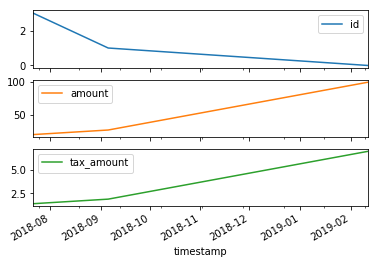

In [162]:
by_timestamp_dropped.plot(subplots=True)

In [204]:
merged_transactions = bank.transactions.merge(bank.accounts, left_on='sender_id', right_on='id', suffixes=('_left', '_right')).merge(bank.accounts, left_on='recipient_id', right_on='id', suffixes=('_sender', '_recipient'))


In [205]:
merged_transactions

,id_left,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,id_right,firstname_sender,lastname_sender,balance_sender,id,firstname_recipient,lastname_recipient,balance_recipient
0,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07,1,Dalia,Das,0.0,3,Manuel,Wiedenmann,0.0
1,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19,2,Matthias,Rettenmeier,0.0,3,Manuel,Wiedenmann,0.0
2,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07,1,Dalia,Das,0.0,2,Matthias,Rettenmeier,0.0
3,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07,1,Dalia,Das,0.0,2,Matthias,Rettenmeier,0.0
4,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07,3,Manuel,Wiedenmann,0.0,1,Dalia,Das,0.0


In [206]:
merged_transactions.drop(['id_left','id_right','id'], axis=1)

,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,firstname_sender,lastname_sender,balance_sender,firstname_recipient,lastname_recipient,balance_recipient
0,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07,Dalia,Das,0.0,Manuel,Wiedenmann,0.0
1,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19,Matthias,Rettenmeier,0.0,Manuel,Wiedenmann,0.0
2,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07,Dalia,Das,0.0,Matthias,Rettenmeier,0.0
3,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07,Dalia,Das,0.0,Matthias,Rettenmeier,0.0
4,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07,Manuel,Wiedenmann,0.0,Dalia,Das,0.0


In [219]:
joined_transactions = bank.transactions.join(bank.accounts.set_index('id'), on='sender_id')
joined_transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,firstname,lastname,balance
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07,Dalia,Das,0.0
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19,Matthias,Rettenmeier,0.0
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07,Manuel,Wiedenmann,0.0
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07,Dalia,Das,0.0
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07,Dalia,Das,0.0


In [224]:
joined_transactions = joined_transactions.join(bank.accounts.set_index('id'), on='recipient_id', lsuffix='_sender', rsuffix='_recipient').sort_index()

In [226]:
joined_transactions.drop(['id'], axis=1)

,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,firstname_sender,lastname_sender,balance_sender,firstname_recipient,lastname_recipient,balance_recipient
0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07,Dalia,Das,0.0,Matthias,Rettenmeier,0.0
1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07,Dalia,Das,0.0,Matthias,Rettenmeier,0.0
2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07,Dalia,Das,0.0,Manuel,Wiedenmann,0.0
3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07,Manuel,Wiedenmann,0.0,Dalia,Das,0.0
4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19,Matthias,Rettenmeier,0.0,Manuel,Wiedenmann,0.0


In [227]:
import numpy as np

In [233]:
bank.transactions['random'] = bank.transactions['category'].apply(lambda item: np.random.rand())

In [234]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,random
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07,0.470285
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19,0.502054
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07,0.341837
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07,0.785226
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07,0.109341


In [237]:
np.random.rand(len(bank.transactions),1)

array([[0.09278643],
       [0.16236102],
       [0.57490829],
       [0.4354818 ],
       [0.68425065]])

In [246]:
bank.transactions['np'] = np.zeros((len(bank.transactions),1))

In [250]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,np
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-28 13:47:32.327153,1.3993,0.07,0.0
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-30 13:47:32.327159,7.6000,0.19,0.0
3,3,3,1,20.00,Mittagessen,Essen,2018-07-21 13:47:32.327157,1.4000,0.07,0.0
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-09-05 13:47:32.327138,1.8893,0.07,0.0
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 13:47:32.292732,7.0000,0.07,0.0
